In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

454904/454904 [==============================] - 25s 56us/step - loss: 11.4161 - rec_loss: 17.8482 - kl_loss: 4.0505 - val_loss: 13.4722 - val_rec_loss: 23.6852 - val_kl_loss: 2.8409
Epoch 17/150
454904/454904 [==============================] - 25s 56us/step - loss: 11.3007 - rec_loss: 17.6329 - kl_loss: 4.0458 - val_loss: 13.2995 - val_rec_loss: 23.3543 - val_kl_loss: 2.8359
Epoch 18/150
454904/454904 [==============================] - 25s 55us/step - loss: 11.2522 - rec_loss: 17.5797 - kl_loss: 4.0187 - val_loss: 13.2231 - val_rec_loss: 23.2829 - val_kl_loss: 2.7738
Epoch 19/150
454904/454904 [==============================] - 25s 55us/step - loss: 11.2335 - rec_loss: 17.5305 - kl_loss: 4.0332 - val_loss: 13.2122 - val_rec_loss: 23.2355 - val_kl_loss: 2.7971
Epoch 20/150
454904/454904 [==============================] - 25s 55us/step - loss: 11.2194 - rec_loss: 17.5165 - kl_loss: 4.0296 - val_loss: 13.1734 - val_rec_loss: 23.1466 - val_kl_loss: 2.7977
Epoch 21/150
454904/454904 [=====

454904/454904 [==============================] - 25s 55us/step - loss: 10.8340 - rec_loss: 16.7774 - kl_loss: 4.1148 - val_loss: 12.8167 - val_rec_loss: 22.4887 - val_kl_loss: 2.7981
Epoch 58/150
454904/454904 [==============================] - 25s 54us/step - loss: 10.8296 - rec_loss: 16.7646 - kl_loss: 4.1119 - val_loss: 12.7549 - val_rec_loss: 22.3004 - val_kl_loss: 2.8552
Epoch 59/150
454904/454904 [==============================] - 25s 54us/step - loss: 10.8147 - rec_loss: 16.7271 - kl_loss: 4.1199 - val_loss: 12.7545 - val_rec_loss: 22.1768 - val_kl_loss: 2.9665
Epoch 60/150
454904/454904 [==============================] - 25s 54us/step - loss: 10.7984 - rec_loss: 16.6945 - kl_loss: 4.1223 - val_loss: 12.9179 - val_rec_loss: 22.5449 - val_kl_loss: 2.9329
Epoch 61/150
454904/454904 [==============================] - 25s 55us/step - loss: 10.8600 - rec_loss: 16.8122 - kl_loss: 4.1193 - val_loss: 12.8078 - val_rec_loss: 22.4112 - val_kl_loss: 2.8450
Epoch 62/150
454904/454904 [=====

454904/454904 [==============================] - 25s 55us/step - loss: 10.7289 - rec_loss: 16.5332 - kl_loss: 4.1395 - val_loss: 12.7136 - val_rec_loss: 22.0812 - val_kl_loss: 2.9748
Epoch 100/150
454904/454904 [==============================] - 25s 54us/step - loss: 10.7621 - rec_loss: 16.5860 - kl_loss: 4.1448 - val_loss: 12.6983 - val_rec_loss: 22.1444 - val_kl_loss: 2.8727
Epoch 101/150
454904/454904 [==============================] - 25s 55us/step - loss: 10.7119 - rec_loss: 16.4841 - kl_loss: 4.1509 - val_loss: 12.7146 - val_rec_loss: 22.1442 - val_kl_loss: 2.9188
Epoch 102/150
454904/454904 [==============================] - 25s 54us/step - loss: 10.7202 - rec_loss: 16.4957 - kl_loss: 4.1547 - val_loss: 12.7014 - val_rec_loss: 22.0696 - val_kl_loss: 2.9513
Epoch 104/150
454904/454904 [==============================] - 26s 56us/step - loss: 10.7327 - rec_loss: 16.5147 - kl_loss: 4.1660 - val_loss: 12.9852 - val_rec_loss: 22.7092 - val_kl_loss: 2.8800
Epoch 105/150
454904/454904 [

454904/454904 [==============================] - 25s 55us/step - loss: 11.0796 - rec_loss: 17.0851 - kl_loss: 4.2600 - val_loss: 12.9309 - val_rec_loss: 22.4301 - val_kl_loss: 3.0430
Epoch 145/150
454904/454904 [==============================] - 25s 55us/step - loss: 10.9420 - rec_loss: 16.8245 - kl_loss: 4.2596 - val_loss: 12.9337 - val_rec_loss: 22.6206 - val_kl_loss: 2.8592
Epoch 146/150
454904/454904 [==============================] - 25s 54us/step - loss: 10.9754 - rec_loss: 16.8879 - kl_loss: 4.2735 - val_loss: 12.8595 - val_rec_loss: 22.3831 - val_kl_loss: 2.9655
Epoch 147/150
454904/454904 [==============================] - 25s 54us/step - loss: 11.0098 - rec_loss: 16.9609 - kl_loss: 4.2603 - val_loss: 12.9810 - val_rec_loss: 22.4629 - val_kl_loss: 3.1350
Epoch 148/150
454904/454904 [==============================] - 25s 55us/step - loss: 10.9976 - rec_loss: 16.9377 - kl_loss: 4.2584 - val_loss: 12.6362 - val_rec_loss: 21.8926 - val_kl_loss: 3.0070
Epoch 149/150
454904/454904 [

454904/454904 [==============================] - 90s 198us/step - loss: 0.0359 - accuracy: 0.9900 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 46/50
454904/454904 [==============================] - 90s 197us/step - loss: 0.0362 - accuracy: 0.9898 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 47/50
454904/454904 [==============================] - 89s 195us/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 48/50
454904/454904 [==============================] - 89s 196us/step - loss: 0.0355 - accuracy: 0.9900 - val_loss: 0.0375 - val_accuracy: 0.9873
Epoch 49/50
454904/454904 [==============================] - 90s 198us/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.0366 - val_accuracy: 0.9873
Epoch 50/50
454904/454904 [==============================] - 89s 195us/step - loss: 0.0357 - accuracy: 0.9900 - val_loss: 0.0356 - val_accuracy: 0.9879


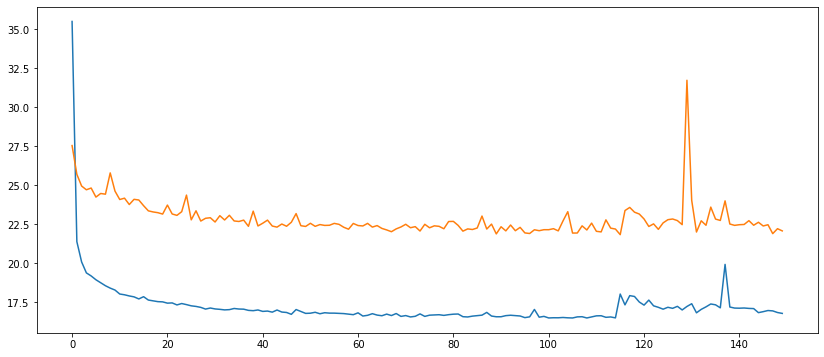

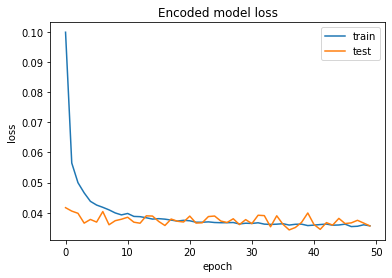

Overall accuracy of Convolutional Neural Network model: 0.9878866612829605


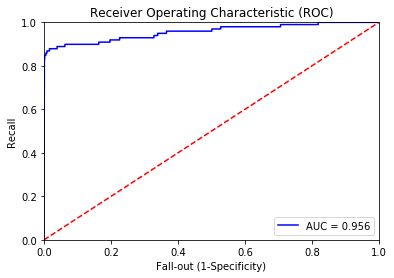

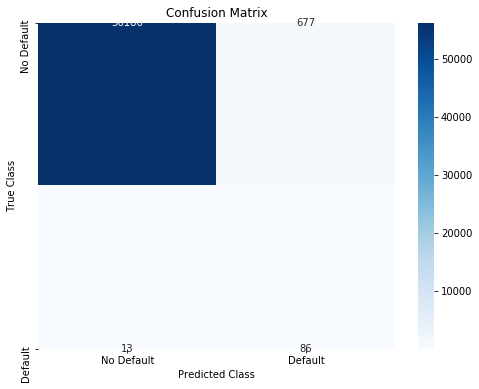

AUC(ROC): 0.9283905299943849
Precision: 0.1127129750982962
Recall: 0.8686868686868687
F1 score: 0.19953596287703013
False positives: 677
True positives: 86
False negatives: 13
True negatives: 56186
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 26s 56us/step - loss: 12.0314 - rec_loss: 18.7622 - kl_loss: 4.3351 - val_loss: 16.1430 - val_rec_loss: 29.0088 - val_kl_loss: 2.8674
Epoch 17/150
454904/454904 [==============================] - 26s 56us/step - loss: 11.9114 - rec_loss: 18.5070 - kl_loss: 4.3669 - val_loss: 13.0634 - val_rec_loss: 22.7675 - val_kl_loss: 2.9889
Epoch 18/150
454904/454904 [==============================] - 25s 56us/step - loss: 11.5373 - rec_loss: 17.8163 - kl_loss: 4.3433 - val_loss: 13.2533 - val_rec_loss: 23.2329 - val_kl_loss: 2.9108
Epoch 19/150
454904/454904 [==============================] - 26s 56us/step - loss: 11.5574 - rec_loss: 17.8603 - kl_loss: 4.3495 - val_loss: 13.2153 - val_rec_loss: 23.2226 - val_kl_loss: 2.8404
Epoch 20/150
454904/454904 [==============================] - 26s 57us/step - loss: 11.4740 - rec_loss: 17.7147 - kl_loss: 4.3452 - val_loss: 13.1721 - val_rec_loss: 23.0296 - val_kl_loss: 2.9556
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.1588 - rec_loss: 17.0517 - kl_loss: 4.4107 - val_loss: 12.6813 - val_rec_loss: 21.9553 - val_kl_loss: 3.0270
Epoch 59/150
454904/454904 [==============================] - 23s 50us/step - loss: 11.0755 - rec_loss: 16.8897 - kl_loss: 4.4133 - val_loss: 12.7184 - val_rec_loss: 21.9749 - val_kl_loss: 3.0797
Epoch 60/150
454904/454904 [==============================] - 23s 50us/step - loss: 11.0673 - rec_loss: 16.8725 - kl_loss: 4.4152 - val_loss: 12.8595 - val_rec_loss: 22.3020 - val_kl_loss: 3.0460
Epoch 61/150
454904/454904 [==============================] - 23s 50us/step - loss: 11.1281 - rec_loss: 16.9827 - kl_loss: 4.4227 - val_loss: 12.8334 - val_rec_loss: 22.2052 - val_kl_loss: 3.0815
Epoch 62/150
454904/454904 [==============================] - 23s 50us/step - loss: 11.0789 - rec_loss: 16.9037 - kl_loss: 4.4089 - val_loss: 12.6932 - val_rec_loss: 21.9923 - val_kl_loss: 3.0183
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9853 - rec_loss: 16.7464 - kl_loss: 4.3994 - val_loss: 12.6691 - val_rec_loss: 21.9135 - val_kl_loss: 3.0686
Epoch 101/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.0552 - rec_loss: 16.8624 - kl_loss: 4.4201 - val_loss: 12.6820 - val_rec_loss: 21.9845 - val_kl_loss: 3.0314
Epoch 102/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.0897 - rec_loss: 16.9444 - kl_loss: 4.4119 - val_loss: 13.0179 - val_rec_loss: 22.6874 - val_kl_loss: 2.9960
Epoch 103/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.0007 - rec_loss: 16.7838 - kl_loss: 4.3985 - val_loss: 12.6282 - val_rec_loss: 21.7921 - val_kl_loss: 3.1207
Epoch 104/150
454904/454904 [==============================] - 23s 50us/step - loss: 11.0945 - rec_loss: 16.9585 - kl_loss: 4.4189 - val_loss: 12.7383 - val_rec_loss: 22.1378 - val_kl_loss: 2.9934
Epoch 105/150
4

454904/454904 [==============================] - 23s 51us/step - loss: 11.0287 - rec_loss: 16.8244 - kl_loss: 4.4231 - val_loss: 12.6540 - val_rec_loss: 21.9057 - val_kl_loss: 3.0474
Epoch 142/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.0324 - rec_loss: 16.8230 - kl_loss: 4.4323 - val_loss: 12.6747 - val_rec_loss: 21.9825 - val_kl_loss: 3.0325
Epoch 143/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.0058 - rec_loss: 16.7674 - kl_loss: 4.4334 - val_loss: 12.6798 - val_rec_loss: 22.0945 - val_kl_loss: 2.9195
Epoch 144/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.0375 - rec_loss: 16.8272 - kl_loss: 4.4354 - val_loss: 12.6135 - val_rec_loss: 21.9173 - val_kl_loss: 2.9674
Epoch 145/150
454904/454904 [==============================] - 23s 51us/step - loss: 10.9896 - rec_loss: 16.7332 - kl_loss: 4.4372 - val_loss: 12.6365 - val_rec_loss: 21.8720 - val_kl_loss: 3.0546
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 79s 173us/step - loss: 0.0570 - accuracy: 0.9778 - val_loss: 0.0565 - val_accuracy: 0.9783
Epoch 43/50
454904/454904 [==============================] - 79s 173us/step - loss: 0.0574 - accuracy: 0.9778 - val_loss: 0.0562 - val_accuracy: 0.9788
Epoch 44/50
454904/454904 [==============================] - 80s 176us/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0592 - val_accuracy: 0.9782
Epoch 45/50
454904/454904 [==============================] - 83s 182us/step - loss: 0.0570 - accuracy: 0.9778 - val_loss: 0.0602 - val_accuracy: 0.9763
Epoch 46/50
454904/454904 [==============================] - 84s 184us/step - loss: 0.0566 - accuracy: 0.9780 - val_loss: 0.0586 - val_accuracy: 0.9769
Epoch 47/50
454904/454904 [==============================] - 83s 184us/step - loss: 0.0567 - accuracy: 0.9782 - val_loss: 0.0531 - val_accuracy: 0.9791
Epoch 48/50
454904/454904 [==============================] - 83s 182us/step - loss: 0.05

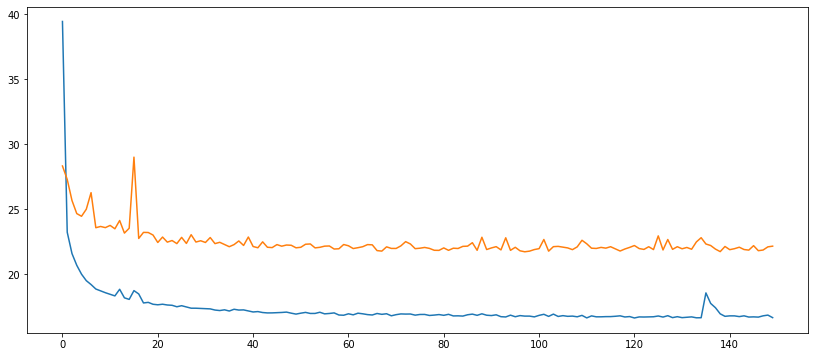

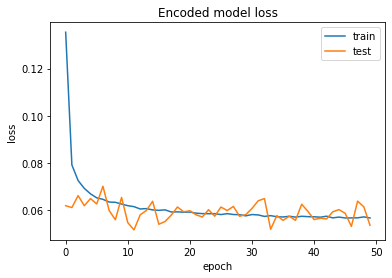

Overall accuracy of Convolutional Neural Network model: 0.9789157684070082


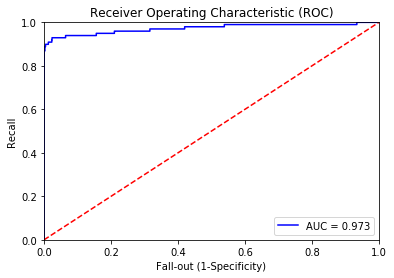

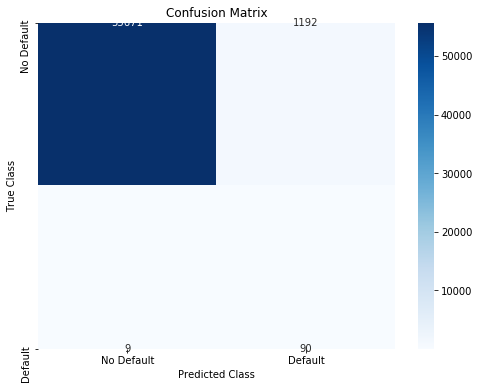

AUC(ROC): 0.9440641222203926
Precision: 0.07020280811232449
Recall: 0.9090909090909091
F1 score: 0.13034033309196233
False positives: 1192
True positives: 90
False negatives: 9
True negatives: 55671
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 24s 52us/step - loss: 11.4518 - rec_loss: 17.8405 - kl_loss: 4.1799 - val_loss: 13.1687 - val_rec_loss: 23.1669 - val_kl_loss: 2.8024
Epoch 17/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.3664 - rec_loss: 17.6749 - kl_loss: 4.1843 - val_loss: 13.1014 - val_rec_loss: 23.0737 - val_kl_loss: 2.7796
Epoch 18/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.3414 - rec_loss: 17.6255 - kl_loss: 4.1901 - val_loss: 13.2621 - val_rec_loss: 23.4656 - val_kl_loss: 2.6936
Epoch 19/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.2837 - rec_loss: 17.5123 - kl_loss: 4.1979 - val_loss: 13.0708 - val_rec_loss: 23.0027 - val_kl_loss: 2.7836
Epoch 20/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.2584 - rec_loss: 17.4767 - kl_loss: 4.1908 - val_loss: 13.1438 - val_rec_loss: 23.1069 - val_kl_loss: 2.8221
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.1879 - rec_loss: 17.3257 - kl_loss: 4.2444 - val_loss: 13.0177 - val_rec_loss: 22.9824 - val_kl_loss: 2.7249
Epoch 59/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.1112 - rec_loss: 17.1604 - kl_loss: 4.2534 - val_loss: 13.2986 - val_rec_loss: 23.4771 - val_kl_loss: 2.7650
Epoch 60/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.1423 - rec_loss: 17.2306 - kl_loss: 4.2458 - val_loss: 12.9437 - val_rec_loss: 22.6827 - val_kl_loss: 2.8684
Epoch 61/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.1476 - rec_loss: 17.2478 - kl_loss: 4.2449 - val_loss: 12.9283 - val_rec_loss: 22.7151 - val_kl_loss: 2.8139
Epoch 62/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.1327 - rec_loss: 17.2205 - kl_loss: 4.2475 - val_loss: 12.8937 - val_rec_loss: 22.7443 - val_kl_loss: 2.7147
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9629 - rec_loss: 16.8602 - kl_loss: 4.3130 - val_loss: 12.8572 - val_rec_loss: 22.4818 - val_kl_loss: 2.9140
Epoch 101/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9941 - rec_loss: 16.8923 - kl_loss: 4.3355 - val_loss: 12.6441 - val_rec_loss: 21.9521 - val_kl_loss: 3.0109
Epoch 102/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9854 - rec_loss: 16.8839 - kl_loss: 4.3247 - val_loss: 12.8330 - val_rec_loss: 22.4536 - val_kl_loss: 2.8993
Epoch 103/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.0054 - rec_loss: 16.8992 - kl_loss: 4.3532 - val_loss: 13.1547 - val_rec_loss: 22.9844 - val_kl_loss: 2.9906
Epoch 104/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9450 - rec_loss: 16.7822 - kl_loss: 4.3457 - val_loss: 13.4939 - val_rec_loss: 23.6656 - val_kl_loss: 2.9924
Epoch 105/150
4

454904/454904 [==============================] - 24s 52us/step - loss: 11.0174 - rec_loss: 16.8554 - kl_loss: 4.3881 - val_loss: 12.9078 - val_rec_loss: 22.3458 - val_kl_loss: 3.1189
Epoch 142/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9578 - rec_loss: 16.7540 - kl_loss: 4.3810 - val_loss: 12.7160 - val_rec_loss: 22.1061 - val_kl_loss: 2.9858
Epoch 143/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9977 - rec_loss: 16.7957 - kl_loss: 4.4102 - val_loss: 12.8375 - val_rec_loss: 22.4259 - val_kl_loss: 2.8991
Epoch 144/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9579 - rec_loss: 16.7537 - kl_loss: 4.3760 - val_loss: 12.9442 - val_rec_loss: 22.4228 - val_kl_loss: 3.1326
Epoch 145/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.0148 - rec_loss: 16.8541 - kl_loss: 4.3908 - val_loss: 12.8016 - val_rec_loss: 22.1370 - val_kl_loss: 3.1293
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 83s 182us/step - loss: 0.0570 - accuracy: 0.9792 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 43/50
454904/454904 [==============================] - 85s 186us/step - loss: 0.0571 - accuracy: 0.9791 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 44/50
454904/454904 [==============================] - 86s 189us/step - loss: 0.0570 - accuracy: 0.9792 - val_loss: 0.0564 - val_accuracy: 0.9816
Epoch 45/50
454904/454904 [==============================] - 86s 189us/step - loss: 0.0568 - accuracy: 0.9792 - val_loss: 0.0592 - val_accuracy: 0.9820
Epoch 46/50
454904/454904 [==============================] - 86s 188us/step - loss: 0.0566 - accuracy: 0.9792 - val_loss: 0.0549 - val_accuracy: 0.9832
Epoch 47/50
454904/454904 [==============================] - 86s 188us/step - loss: 0.0568 - accuracy: 0.9793 - val_loss: 0.0564 - val_accuracy: 0.9816
Epoch 48/50
454904/454904 [==============================] - 86s 189us/step - loss: 0.05

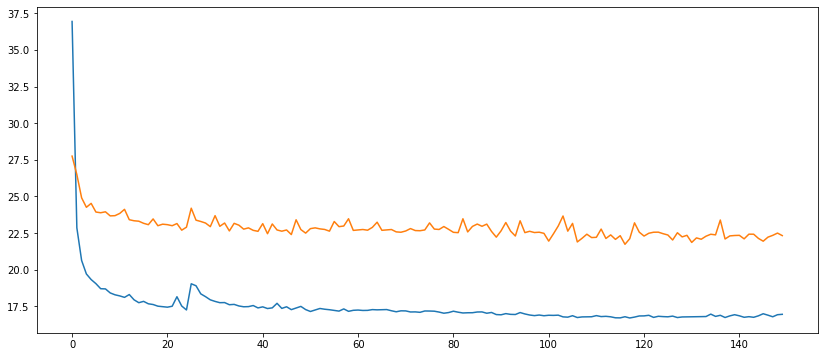

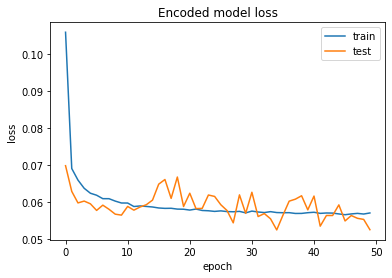

Overall accuracy of Convolutional Neural Network model: 0.9829005810993486


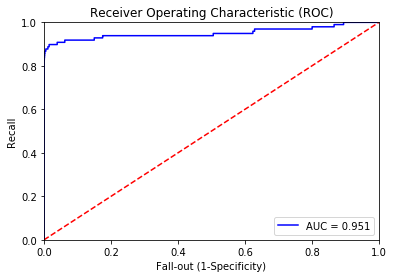

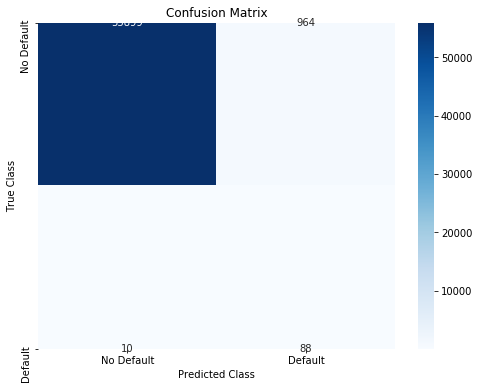

AUC(ROC): 0.9405030781107617
Precision: 0.08365019011406843
Recall: 0.8979591836734694
F1 score: 0.15304347826086956
False positives: 964
True positives: 88
False negatives: 10
True negatives: 55899
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 23s 52us/step - loss: 11.8313 - rec_loss: 18.0085 - kl_loss: 4.4121 - val_loss: 13.5045 - val_rec_loss: 23.6526 - val_kl_loss: 2.8043
Epoch 17/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.7884 - rec_loss: 17.9395 - kl_loss: 4.4132 - val_loss: 13.1725 - val_rec_loss: 22.9226 - val_kl_loss: 2.8824
Epoch 18/150
454904/454904 [==============================] - 23s 52us/step - loss: 11.7160 - rec_loss: 17.8115 - kl_loss: 4.4150 - val_loss: 13.2626 - val_rec_loss: 23.1795 - val_kl_loss: 2.8258
Epoch 19/150
454904/454904 [==============================] - 23s 52us/step - loss: 11.6970 - rec_loss: 17.7966 - kl_loss: 4.4069 - val_loss: 13.2803 - val_rec_loss: 23.2543 - val_kl_loss: 2.7735
Epoch 20/150
454904/454904 [==============================] - 23s 52us/step - loss: 11.6801 - rec_loss: 17.7695 - kl_loss: 4.4040 - val_loss: 13.2274 - val_rec_loss: 23.0991 - val_kl_loss: 2.8421
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.0732 - rec_loss: 16.8948 - kl_loss: 4.3969 - val_loss: 12.7227 - val_rec_loss: 22.1507 - val_kl_loss: 2.9277
Epoch 59/150
454904/454904 [==============================] - 23s 52us/step - loss: 11.0801 - rec_loss: 16.9045 - kl_loss: 4.3966 - val_loss: 12.7034 - val_rec_loss: 22.2270 - val_kl_loss: 2.8120
Epoch 60/150
454904/454904 [==============================] - 23s 52us/step - loss: 11.1083 - rec_loss: 16.9669 - kl_loss: 4.3982 - val_loss: 12.7694 - val_rec_loss: 22.2808 - val_kl_loss: 2.8894
Epoch 61/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.0623 - rec_loss: 16.8757 - kl_loss: 4.4020 - val_loss: 12.9387 - val_rec_loss: 22.5621 - val_kl_loss: 2.9567
Epoch 62/150
454904/454904 [==============================] - 23s 52us/step - loss: 11.0491 - rec_loss: 16.8662 - kl_loss: 4.3943 - val_loss: 12.7884 - val_rec_loss: 22.4104 - val_kl_loss: 2.8112
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 24s 52us/step - loss: 10.9175 - rec_loss: 16.6357 - kl_loss: 4.4218 - val_loss: 12.7415 - val_rec_loss: 22.2319 - val_kl_loss: 2.8996
Epoch 101/150
454904/454904 [==============================] - 23s 52us/step - loss: 10.9604 - rec_loss: 16.7334 - kl_loss: 4.4201 - val_loss: 12.9993 - val_rec_loss: 22.7390 - val_kl_loss: 2.9114
Epoch 102/150
454904/454904 [==============================] - 23s 52us/step - loss: 10.9537 - rec_loss: 16.7275 - kl_loss: 4.4153 - val_loss: 12.7776 - val_rec_loss: 22.3436 - val_kl_loss: 2.8587
Epoch 103/150
454904/454904 [==============================] - 23s 52us/step - loss: 10.9501 - rec_loss: 16.7194 - kl_loss: 4.4127 - val_loss: 12.7090 - val_rec_loss: 22.1032 - val_kl_loss: 2.9582
Epoch 104/150
454904/454904 [==============================] - 23s 52us/step - loss: 10.9448 - rec_loss: 16.7027 - kl_loss: 4.4199 - val_loss: 12.7867 - val_rec_loss: 22.2210 - val_kl_loss: 2.9900
Epoch 105/150
4

454904/454904 [==============================] - 23s 52us/step - loss: 10.8981 - rec_loss: 16.6530 - kl_loss: 4.4334 - val_loss: 12.5827 - val_rec_loss: 21.9548 - val_kl_loss: 2.8882
Epoch 142/150
454904/454904 [==============================] - 23s 52us/step - loss: 10.9147 - rec_loss: 16.6842 - kl_loss: 4.4282 - val_loss: 12.9549 - val_rec_loss: 22.6663 - val_kl_loss: 2.9142
Epoch 143/150
454904/454904 [==============================] - 23s 52us/step - loss: 10.9029 - rec_loss: 16.6434 - kl_loss: 4.4481 - val_loss: 12.7623 - val_rec_loss: 22.2779 - val_kl_loss: 2.9075
Epoch 144/150
454904/454904 [==============================] - 23s 51us/step - loss: 10.8964 - rec_loss: 16.6412 - kl_loss: 4.4395 - val_loss: 12.7566 - val_rec_loss: 22.2671 - val_kl_loss: 2.9157
Epoch 145/150
454904/454904 [==============================] - 23s 50us/step - loss: 10.9225 - rec_loss: 16.6923 - kl_loss: 4.4397 - val_loss: 13.2692 - val_rec_loss: 23.0698 - val_kl_loss: 3.1358
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 86s 188us/step - loss: 0.0501 - accuracy: 0.9807 - val_loss: 0.0566 - val_accuracy: 0.9806
Epoch 43/50
454904/454904 [==============================] - 84s 185us/step - loss: 0.0498 - accuracy: 0.9809 - val_loss: 0.0561 - val_accuracy: 0.9793
Epoch 44/50
454904/454904 [==============================] - 82s 179us/step - loss: 0.0496 - accuracy: 0.9809 - val_loss: 0.0588 - val_accuracy: 0.9790
Epoch 45/50
454904/454904 [==============================] - 82s 179us/step - loss: 0.0498 - accuracy: 0.9808 - val_loss: 0.0538 - val_accuracy: 0.9835
Epoch 46/50
454904/454904 [==============================] - 85s 187us/step - loss: 0.0496 - accuracy: 0.9809 - val_loss: 0.0595 - val_accuracy: 0.9806
Epoch 47/50
454904/454904 [==============================] - 85s 187us/step - loss: 0.0500 - accuracy: 0.9810 - val_loss: 0.0513 - val_accuracy: 0.9824
Epoch 48/50
454904/454904 [==============================] - 85s 187us/step - loss: 0.04

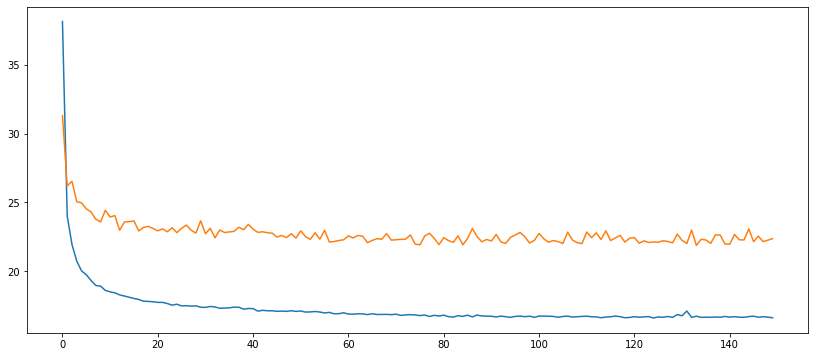

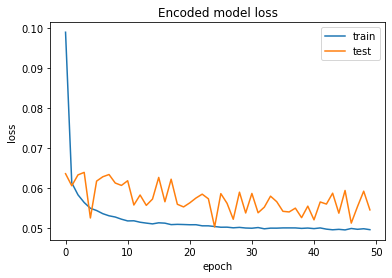

Overall accuracy of Convolutional Neural Network model: 0.9807060971541932


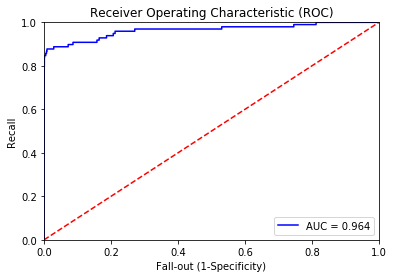

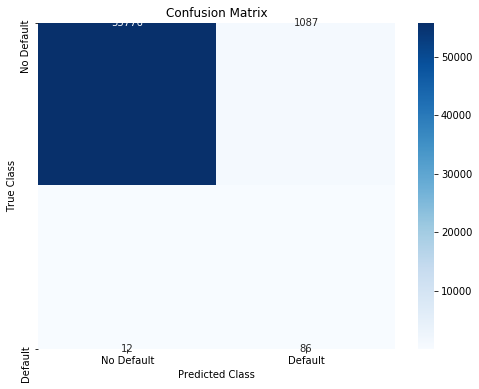

AUC(ROC): 0.9292174496022843
Precision: 0.0733162830349531
Recall: 0.8775510204081632
F1 score: 0.13532651455546812
False positives: 1087
True positives: 86
False negatives: 12
True negatives: 55776
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

454904/454904 [==============================] - 24s 53us/step - loss: 11.7211 - rec_loss: 18.3507 - kl_loss: 4.0279 - val_loss: 14.1439 - val_rec_loss: 24.9287 - val_kl_loss: 2.8525
Epoch 17/150
454904/454904 [==============================] - 24s 53us/step - loss: 11.6946 - rec_loss: 18.3184 - kl_loss: 4.0281 - val_loss: 13.8764 - val_rec_loss: 24.4601 - val_kl_loss: 2.7941
Epoch 18/150
454904/454904 [==============================] - 24s 53us/step - loss: 11.6612 - rec_loss: 18.2813 - kl_loss: 4.0263 - val_loss: 13.7891 - val_rec_loss: 24.3792 - val_kl_loss: 2.6986
Epoch 19/150
454904/454904 [==============================] - 24s 53us/step - loss: 11.7833 - rec_loss: 18.5287 - kl_loss: 4.0346 - val_loss: 14.0559 - val_rec_loss: 24.9980 - val_kl_loss: 2.6040
Epoch 20/150
454904/454904 [==============================] - 24s 53us/step - loss: 11.6867 - rec_loss: 18.3051 - kl_loss: 4.0545 - val_loss: 13.5957 - val_rec_loss: 23.8471 - val_kl_loss: 2.8307
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.8812 - rec_loss: 18.6672 - kl_loss: 4.1909 - val_loss: 12.8672 - val_rec_loss: 22.4957 - val_kl_loss: 2.8585
Epoch 59/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.5979 - rec_loss: 18.1511 - kl_loss: 4.1605 - val_loss: 12.8124 - val_rec_loss: 22.3718 - val_kl_loss: 2.8719
Epoch 60/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.5837 - rec_loss: 18.1333 - kl_loss: 4.1585 - val_loss: 12.7100 - val_rec_loss: 22.1676 - val_kl_loss: 2.8918
Epoch 61/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.4438 - rec_loss: 17.8900 - kl_loss: 4.1320 - val_loss: 12.7563 - val_rec_loss: 22.3815 - val_kl_loss: 2.7666
Epoch 62/150
454904/454904 [==============================] - 23s 50us/step - loss: 11.4698 - rec_loss: 17.9565 - kl_loss: 4.1175 - val_loss: 12.6243 - val_rec_loss: 22.1685 - val_kl_loss: 2.7361
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 23s 51us/step - loss: 12.0189 - rec_loss: 19.1372 - kl_loss: 4.0935 - val_loss: 15.3283 - val_rec_loss: 27.2913 - val_kl_loss: 2.9424
Epoch 101/150
454904/454904 [==============================] - 23s 51us/step - loss: 12.0618 - rec_loss: 19.0976 - kl_loss: 4.1618 - val_loss: 13.9125 - val_rec_loss: 24.6939 - val_kl_loss: 2.7554
Epoch 102/150
454904/454904 [==============================] - 23s 51us/step - loss: 11.4726 - rec_loss: 18.0606 - kl_loss: 4.0589 - val_loss: 13.5893 - val_rec_loss: 24.1205 - val_kl_loss: 2.6684
Epoch 103/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.5379 - rec_loss: 18.1934 - kl_loss: 4.0666 - val_loss: 14.0009 - val_rec_loss: 24.6559 - val_kl_loss: 2.9515
Epoch 104/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.4782 - rec_loss: 18.0932 - kl_loss: 4.0502 - val_loss: 13.6532 - val_rec_loss: 24.1369 - val_kl_loss: 2.7533
Epoch 105/150
4

454904/454904 [==============================] - 24s 52us/step - loss: 11.0707 - rec_loss: 17.2396 - kl_loss: 4.0708 - val_loss: 12.6370 - val_rec_loss: 22.2461 - val_kl_loss: 2.6686
Epoch 142/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.1029 - rec_loss: 17.2970 - kl_loss: 4.0791 - val_loss: 13.1162 - val_rec_loss: 23.3883 - val_kl_loss: 2.4588
Epoch 143/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.1253 - rec_loss: 17.3333 - kl_loss: 4.0826 - val_loss: 12.7947 - val_rec_loss: 22.5500 - val_kl_loss: 2.6662
Epoch 144/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.1493 - rec_loss: 17.3910 - kl_loss: 4.0788 - val_loss: 13.6712 - val_rec_loss: 23.9826 - val_kl_loss: 2.9614
Epoch 145/150
454904/454904 [==============================] - 24s 52us/step - loss: 11.1180 - rec_loss: 17.3345 - kl_loss: 4.0718 - val_loss: 12.8330 - val_rec_loss: 22.6215 - val_kl_loss: 2.6617
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.0636 - accuracy: 0.9763 - val_loss: 0.0694 - val_accuracy: 0.9633
Epoch 43/50
454904/454904 [==============================] - 97s 212us/step - loss: 0.0632 - accuracy: 0.9761 - val_loss: 0.0670 - val_accuracy: 0.9659
Epoch 44/50
454904/454904 [==============================] - 94s 208us/step - loss: 0.0633 - accuracy: 0.9761 - val_loss: 0.0707 - val_accuracy: 0.9647
Epoch 45/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.0631 - accuracy: 0.9761 - val_loss: 0.0638 - val_accuracy: 0.9660
Epoch 46/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.0632 - accuracy: 0.9762 - val_loss: 0.0606 - val_accuracy: 0.9700
Epoch 47/50
454904/454904 [==============================] - 96s 211us/step - loss: 0.0632 - accuracy: 0.9761 - val_loss: 0.0688 - val_accuracy: 0.9643
Epoch 48/50
454904/454904 [==============================] - 95s 208us/step - loss: 0.06

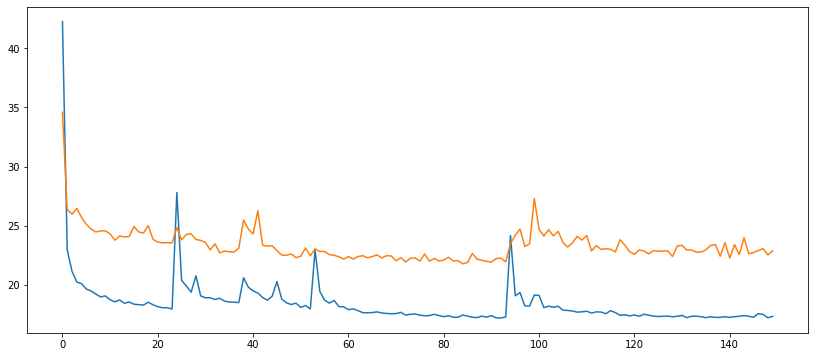

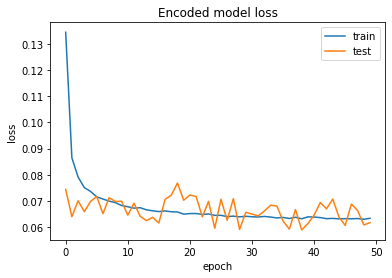

Overall accuracy of Convolutional Neural Network model: 0.967433858253893


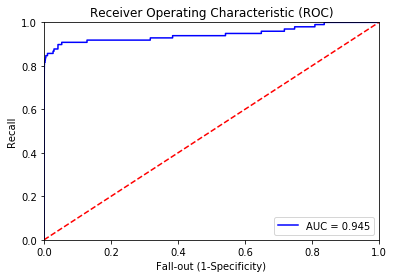

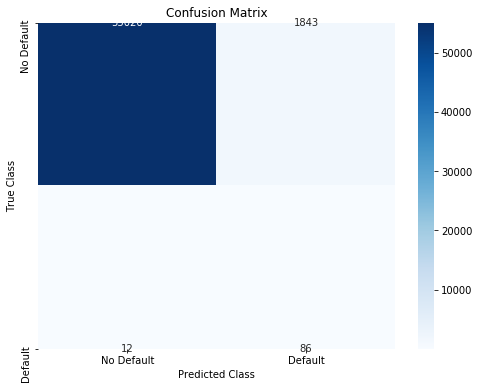

AUC(ROC): 0.9225698931947786
Precision: 0.044582685329186106
Recall: 0.8775510204081632
F1 score: 0.08485446472619634
False positives: 1843
True positives: 86
False negatives: 12
True negatives: 55020


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = BorderlineSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 55710.4
Average fp = 1152.6
Average fn = 11.2
Average tp = 87.2
Average Precision = 7.03%
Average Recall = 88.62%
Average F1 score = 13.03%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 278552
Total fp: 5763
 Total fn:56
 Total tp:436
Total Precision = 0.07033392482658493
Total Recall = 0.8861788617886179
Total F1_score = 0.13032431624570318
